In [1]:
import pandas as pd 
import altair as alt 
import numpy as np 
import altair as alt

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [3]:
# Load data
dwellings = pd.read_csv('https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_denver/dwellings_denver.csv')
dwellings_ml = pd.read_csv('https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_ml/dwellings_ml.csv')
neighborhood = pd.read_csv('https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_neighborhoods_ml/dwellings_neighborhoods_ml.csv')
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [100]:
# Removes the target and keeps all features
#split dataset in features and target variable
X = dwellings_ml.drop(dwellings_ml.filter(regex = 'before1980|yrbuilt|parcel').columns, axis = 1)
# Selects the target column
y = dwellings_ml.filter(regex = "before1980")
# Splitting X and y variables into train and test sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33, random_state = 77)

In [107]:
# clf stands for classifier model.
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf.fit(X_train, y_train)
#  Using the features in the test set to make predictions
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

In [108]:
def get_auc_scores(dec_tree, X_train, X_test, y_train, y_test):
    y_train_score = dec_tree.predict_proba(X_train)[:, 1]
    y_test_score = dec_tree.predict_proba(X_test)[:, 1]
    auc_train = roc_auc_score(y_train, y_train_score)
    auc_test = roc_auc_score(y_test, y_test_score)    
    print(f"""
    Training AUC: {auc_train}
    Testing AUC: {auc_test}""")
    return y_test_score
y_test_score = get_auc_scores(clf, X_train, X_test, y_train, y_test)


    Training AUC: 1.0
    Testing AUC: 0.893918485198102


Below is the output of this function. To read the ROC curve, we are looking to have the bend of the curve in the upper left corner. The closer the curve is to the 45-degree line, the worse our model performs.


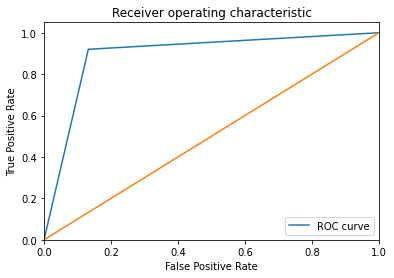

In [110]:
def plot_roc_curve(y_test, y_test_score): 
    # fpr is the false positive rate, tpr is the true positive rate.
    fpr, tpr, _ = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label="ROC curve")
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.savefig('roc_curve.png')
    plt.show() 
plot_roc_curve(y_test, y_test_score)

In [111]:
df_features = pd.DataFrame(
    {'f_names': X_train.columns, 
    'f_values': clf.feature_importances_}).sort_values('f_values', ascending = False)

In [112]:
print(metrics.classification_report(y_test, y_test_score))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2859
           1       0.92      0.92      0.92      4703

    accuracy                           0.90      7562
   macro avg       0.89      0.89      0.89      7562
weighted avg       0.90      0.90      0.90      7562



In [113]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_score))

Accuracy: 0.9002909283258397
